In [2]:
# Handwriting number classification
# Datsets - MNIST

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

In [ ]:
# If we want to have plots within the code itself
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# In this line we are splitting the data into train and test data 
x_train, x_test = x[0:60000], x[60000:69999]
y_train, y_test = y[0:60000], y[60000:69999]

In [5]:
# We are using SVM from sklearn
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [7]:
# In This line we are uploding a img 
from google.colab import files
uploaded = files.upload()

Saving Webp.net-resizeimage.jpg to Webp.net-resizeimage (1).jpg


array(['3'], dtype=object)

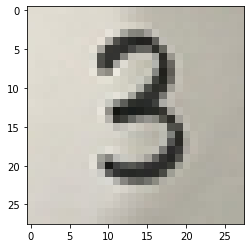

In [8]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#In this line we are changing the dictionary into a list
file_name = list(uploaded.keys())[0] 
#In this line we are opening a img file
uploaded_image = Image.open(file_name)
#In this line we are changing the img into 28 X 28 pixels
smaller_image = uploaded_image.thumbnail((28, 28))
#In this line we are saving the file with a different name
uploaded_image.save("smaller_"+file_name)

#In this line we are coverting the RGB (any other type img) img into Grayscale img
img_grey = cv2.imread("smaller_"+file_name, cv2.IMREAD_GRAYSCALE)

#To ignore the gray colour in the img we are changing it into black or white colour
#if the pixel is grater than 128 then it will covert into 255
img_binary = cv2.threshold(img_grey, 128, 255, cv2.THRESH_BINARY)[1]

#In this line we are joining all the small lists(rows) into one big list(entire img)
img_binary_flatten = img_binary.flatten()

#In this line we are inverting the binary value of the img 
#Eg : 1, 0, 1, 0, into  0, 1, 0, 1,
img_binary_invert = np.invert(img_binary_flatten)

#In this line we are ploting the img
plt.imshow(uploaded_image)

#In this line we are predicting our model
clf.predict([img_binary_invert])

In [9]:
from sklearn import metrics
# In this line we are using confusion matrix to see the performance of our model
y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 944,    0,    4,    1,    0,    3,   15,    3,    2,    8],
       [   0, 1122,    4,    1,    0,    1,    4,    1,    1,    1],
       [   8,   53,  866,   28,    9,    2,   17,   14,   30,    5],
       [   3,    7,   21,  919,    2,    7,    6,   14,   13,   18],
       [   1,    7,    8,    2,  890,    0,   12,   12,    1,   49],
       [  12,   10,    2,   79,   34,  629,   40,   10,   56,   20],
       [   7,    4,    6,    2,    6,   11,  918,    0,    1,    2],
       [   2,   21,   21,    4,    6,    0,    2,  931,    1,   40],
       [  11,   82,   15,   56,   42,   31,   21,   26,  606,   84],
       [   7,   16,    2,   11,   48,    1,    0,   55,    1,  868]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 86.93869386938694


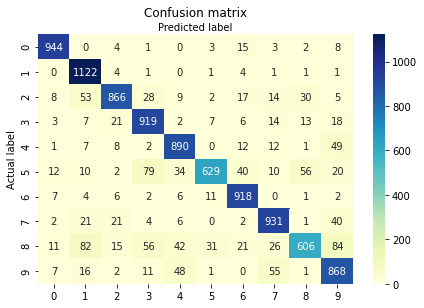

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat map
# To visualize the accuracy of our model we are using heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)